In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import re
import sqlite3
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## A. Importing and cleaning the data

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

C:\Users\AsmaChabane\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We display all the columns to have a better overview of the dataframe

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)
df.head(20)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN

We replace the product_name by the generic_name when it exists to get rid of special characters.

In [4]:
df['product_name'][df['generic_name'].notnull()] = df['generic_name']
df = df.drop(['generic_name'], axis=1)


<ipython-input-4-67f184886cd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['product_name'][df['generic_name'].notnull()] = df['generic_name']


We remove the columns that don't bring relevant information, for example xxx_tags and print the shape to be sure it has been done.

In [5]:
list=[]
for c in df.columns:
    if ('tags' in c) or ('_en' in c):
        list.append(c)
print(list)
print(df.shape)

['packaging_tags', 'brands_tags', 'categories_tags', 'categories_en', 'origins_tags', 'manufacturing_places_tags', 'labels_tags', 'labels_en', 'emb_codes_tags', 'cities_tags', 'countries_tags', 'countries_en', 'allergens_en', 'traces_tags', 'traces_en', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'states_tags', 'states_en', 'main_category_en']
(356027, 162)


In [6]:
df = df.drop(list, axis=1)
df.shape[1]

140

In [7]:
df = df.drop(['code', 'url', 'creator', 'created_t',  'last_modified_t', 'quantity', 'manufacturing_places', 'cities'], axis=1)
df.shape[1]            

132

We compute the percentage of missing values and examine the type of the columns

In [8]:
df.dtypes

created_datetime                            object
last_modified_datetime                      object
product_name                                object
packaging                                   object
brands                                      object
categories                                  object
origins                                     object
labels                                      object
emb_codes                                   object
first_packaging_code_geo                    object
purchase_places                             object
stores                                      object
countries                                   object
ingredients_text                            object
allergens                                   object
traces                                      object
serving_size                                object
no_nutriments                              float64
additives_n                                float64
additives                      

In [9]:
df.isna().sum()/df.shape[0]*100

created_datetime                             0.002809
last_modified_datetime                       0.000000
product_name                                 4.886708
packaging                                   74.732534
brands                                       8.159494
categories                                  70.985627
origins                                     92.964017
labels                                      83.400697
emb_codes                                   90.874288
first_packaging_code_geo                    94.137523
purchase_places                             81.303384
stores                                      83.793083
countries                                    0.077241
ingredients_text                            20.260823
allergens                                   89.558095
traces                                      92.017178
serving_size                                39.156019
no_nutriments                              100.000000
additives_n                 

In [10]:
df = df[df['product_name'].notna()]

A lot of  numerical columns have a high % of missing value, we wonder if a missing value means that the element is not in the product : we check more carefully some columns to validate or not this assumption:

In [11]:
df[['product_name', 'allergens', 'fat_100g', 'fruits-vegetables-nuts_100g', 'ingredients_from_palm_oil_n', 'calcium_100g', 'phosphorus_100g', 'potassium_100g']].head(100)

,product_name,allergens,fat_100g,fruits-vegetables-nuts_100g,ingredients_from_palm_oil_n,calcium_100g,phosphorus_100g,potassium_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,28.57,NaN,0.0,0.000,NaN,NaN
2,Peanuts,NaN,17.86,NaN,0.0,0.071,NaN,NaN
3,Organic Salted Nut Mix,NaN,57.14,NaN,0.0,0.143,NaN,NaN
4,Organic Polenta,NaN,1.43,NaN,0.0,NaN,NaN,NaN
5,Breadshop Honey Gone Nuts Granola,NaN,18.27,NaN,0.0,0.038,NaN,NaN
6,Organic Long Grain White Rice,NaN,NaN,NaN,0.0,0.044,NaN,NaN
7,Organic Muesli,NaN,18.75,NaN,0.0,0.062,NaN,NaN
8,Organic Dark Chocolate Minis,NaN,37.50,NaN,0.0,0.050,NaN,NaN
9,Organic Sunflower Oil,NaN,100.00,NaN,0.0,NaN,NaN,NaN


We decide to drop elements that have Nan value for all the numerical columns and see how many elements remain:

In [12]:
num_columns = []

for c in df.columns:
    if df[c].dtypes == 'float64':
        num_columns.append(c)
        

df = df.dropna(subset = num_columns, how = 'all')
df = df.reset_index(drop=True)
df.shape

(308077, 132)

We also drop the columns with more than 95% missing value, we assume that for the other numerical columns, a Nan value means that the macronutrient is absent. 

In [13]:

for col in df.columns:
    if df[col].isna().sum()/df.shape[0]*100 > 95:
        if col in num_columns:
            num_columns.remove(col)
        df = df.drop(col, axis=1)
    
df[num_columns+['additives_n']] = df[num_columns+['additives_n']].fillna(value = 0)
df

,created_datetime,last_modified_datetime,product_name,packaging,brands,categories,origins,labels,emb_codes,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,main_category,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.0,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.0,0.000,0.00129,14.0,14.0
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.0,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.0,0.071,0.00129,0.0,0.0
2,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,Grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2540.0,57.14,5.36,0.0,0.0,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,0.0,0.0000,0.0,0.143,0.00514,12.0,12.0
3,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,NaN,Bob's Red Mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Organic polenta,NaN,NaN,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1552.0,1.43,0.00,0.0,0.0,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,0.0,0.0000,0.0,0.000,0.00000,0.0,0.0
4,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,Unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1933.0,18.27,1.92,0.0,0.0,0.0,0.000,63.46,11.54,7.7,13.46,0.00000,0.000,0.0,0.0000,0.0,0.038,0.00346,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308072,2013-07-10T18:20:08Z,2016-01-03T20:00:15Z,Vins blanc du Bugey,Bouteille en verre,Roussette du Bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...","Flaxieu,Bugey,Ain",AOC,NaN,NaN,"France,Châtillon-sur-Chalaronne",La Marande,France,NaN,NaN,Anhydride sulfureux et sulfites,NaN,0.0,NaN,0.0,0.0,NaN,NaN,Alcoholic beverages,"en:to-be-completed, en:nutrition-facts-complet...",en:beverages,http://en.openfoodfacts.org/images/products/99...,http://en.openfoodfacts.org/images/products/99...,0.0,0.00,0.00,0.0,0.0,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0000,0.0,0.000,0.00000,0.0,0.0
308073,2013-04-28T15:30:39Z,2013-06-20T01:09:16Z,thé bio équitable,"boîte,carton",Lobodis,thés verts,NaN,"AB,Bio européen,Max Havelaar",NaN,NaN,NaN,NaN,France,"thé vert, arôme naturel bergamote avec autres ...",NaN,NaN,NaN,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,0.0,NaN,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...",en:beverages,

We check if we have some outliers

In [14]:
 (df[num_columns] >df[num_columns].max()*0.75).sum()

additives_n                                 56
ingredients_from_palm_oil_n                 77
ingredients_that_may_be_from_palm_oil_n      6
energy_100g                                  1
fat_100g                                     1
saturated-fat_100g                           1
monounsaturated-fat_100g                   108
polyunsaturated-fat_100g                     8
trans-fat_100g                               1
cholesterol_100g                             1
carbohydrates_100g                           1
sugars_100g                                  1
fiber_100g                                   1
proteins_100g                                1
salt_100g                                    1
sodium_100g                                  1
vitamin-a_100g                               1
vitamin-c_100g                               1
potassium_100g                               1
calcium_100g                                 3
iron_100g                                    2
nutrition-sco

In [15]:
df[num_columns].max()

additives_n                                3.000000e+01
ingredients_from_palm_oil_n                2.000000e+00
ingredients_that_may_be_from_palm_oil_n    6.000000e+00
energy_100g                                2.311990e+05
fat_100g                                   1.566667e+10
saturated-fat_100g                         5.500000e+02
monounsaturated-fat_100g                   1.000000e+02
polyunsaturated-fat_100g                   9.800000e+01
trans-fat_100g                             3.690000e+02
cholesterol_100g                           9.523800e+01
carbohydrates_100g                         1.566667e+10
sugars_100g                                3.520000e+03
fiber_100g                                 8.481815e+10
proteins_100g                              1.566667e+10
salt_100g                                  6.431280e+04
sodium_100g                                2.532000e+04
vitamin-a_100g                             2.670000e+01
vitamin-c_100g                             7.169

In [16]:
df[num_columns].idxmax()

additives_n                                153742
ingredients_from_palm_oil_n                104783
ingredients_that_may_be_from_palm_oil_n    289866
energy_100g                                302942
fat_100g                                   171875
saturated-fat_100g                         302942
monounsaturated-fat_100g                    76945
polyunsaturated-fat_100g                   296453
trans-fat_100g                              11721
cholesterol_100g                           135097
carbohydrates_100g                         171875
sugars_100g                                302942
fiber_100g                                 269130
proteins_100g                              171875
salt_100g                                  143030
sodium_100g                                143030
vitamin-a_100g                              65183
vitamin-c_100g                             146873
potassium_100g                             146871
calcium_100g                               129020


We delete the rows which are maximum of a column but with no close neighbor (ie when no other element has a value >75% of the maximum)

In [17]:
df = df.drop([306518, 172093, 11733, 135275, 270287, 143219, 65264, 147064])
df = df.reset_index(drop=True)

In [18]:
df[num_columns].max()

additives_n                                3.000000e+01
ingredients_from_palm_oil_n                2.000000e+00
ingredients_that_may_be_from_palm_oil_n    6.000000e+00
energy_100g                                2.311990e+05
fat_100g                                   1.566667e+10
saturated-fat_100g                         5.500000e+02
monounsaturated-fat_100g                   1.000000e+02
polyunsaturated-fat_100g                   9.800000e+01
trans-fat_100g                             3.690000e+02
cholesterol_100g                           9.523800e+01
carbohydrates_100g                         1.566667e+10
sugars_100g                                3.520000e+03
fiber_100g                                 8.481815e+10
proteins_100g                              1.566667e+10
salt_100g                                  6.431280e+04
sodium_100g                                2.532000e+04
vitamin-a_100g                             2.670000e+01
vitamin-c_100g                             7.169

The new maxima seem more acceptable !

We change the index to the product name and remove the duplicates. 

In [19]:
df = df.set_index('product_name')
df = df[~df.index.duplicated(keep='first')]
df

,created_datetime,last_modified_datetime,packaging,brands,categories,origins,labels,emb_codes,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,main_category,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.0,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000000,0.0,0.0214,0.0,0.000,0.00129,14.0,14.0
Peanuts,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.0,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250000,0.0,0.0000,0.0,0.071,0.00129,0.0,0.0
Organic Salted Nut Mix,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,NaN,Grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2540.0,57.14,5.36,0.0,0.0,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482000,0.0,0.0000,0.0,0.143,0.00514,12.0,12.0
Organic Polenta,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,NaN,Bob's Red Mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Organic polenta,NaN,NaN,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1552.0,1.43,0.00,0.0,0.0,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000000,0.0,0.0000,0.0,0.000,0.00000,0.0,0.0
Breadshop Honey Gone Nuts Granola,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,NaN,Unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1933.0,18.27,1.92,0.0,0.0,0.0,0.000,63.46,11.54,7.7,13.46,0.00000,0.000000,0.0,0.0000,0.0,0.038,0.00346,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tartines craquantes bio au sarrasin,2015-07-25T09:47:06Z,2015-09-14T13:37:28Z,"Boîte,Carton,Sachet,Plastique",Le Pain des fleurs,"Biscottes au sarrasin,Biscottes",NaN,"Bio,Bio européen,Sans gluten,AB Agriculture Bi...",NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,a,Cereals and potatoes,Bread,"en:to-be-completed, en:nutrition-facts-complet...",en:plant-based-foods-and-beverages,http://en.openfoodfacts.org/images/products/98...,http://en.openfoodfacts.org/images/products/98...,1643.0,2.80,0.60,0.0,0.0,0.0,0.000,74.80,2.60,5.9,13.00,0.68000,0.267717,0.0,0.0000,0.0,0.000,0.00380,-4.0,-4.0
Vins blanc du Bugey,2013-07-10T18:20:08Z,2016-01-03T20:00:15Z,Bouteille en verre,Roussette du Bugey,"Boissons,Boissons alcoolisées,Vins,Vins blancs...","Flaxieu,Bugey,Ain",AOC,NaN,NaN,"France,Châtillon-sur-Chalaronne",La Marande,France,NaN,NaN,Anhydride sulfureux et sulfites,NaN,0.0,NaN,0.0,0.0,NaN,NaN,Alcoholic beverages,"en:to-

## B. Manipulating the data

#### 1- What is the best fat to cook with (high polyinsaturated fat and mono, low saturated fat)

In [20]:
df_fat = df[df['fat_100g'] > 80]
df_fat['saturated-fat_100g'].replace(0,1).isnull().sum()

0

In [21]:
df_fat['saturated-fat_100g'].replace(0,1, inplace=True)
df_fat['coeff'] = (10*df_fat['monounsaturated-fat_100g'] + df_fat['polyunsaturated-fat_100g'] ) / df_fat['saturated-fat_100g']

C:\Users\AsmaChabane\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-21-268dcd093c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fat['coeff'] = (10*df_fat['monounsaturated-fat_100g'] + df_fat['polyunsaturated-fat_100g'] ) / df_fat['saturated-fat_100g']


In [22]:
df_fat[['coeff', 'fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'saturated-fat_100g']].sort_values('coeff', ascending=False).head(20)

,coeff,fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,saturated-fat_100g
product_name,,,,,
Premium Cold Pressed Extra Virgin Olive Oil,676.700000,93.33,66.67,10.00,1.00
OLIO EXTRA VERGINE DI OLIVA,670.700000,91.30,66.10,9.70,1.00
"La Tourangelle, Roasted Pistachio Spray Oil",550.000000,100.00,50.00,50.00,1.00
"La Tourangelle, Avocado Spray Oil",500.000000,100.00,50.00,0.00,1.00
"La Tourangelle, Extra Virgin Olive Spray Oil",500.000000,100.00,50.00,0.00,1.00
Thai Wok Spray Oil,500.000000,100.00,50.00,0.00,1.00
Organic Canola Spray Oil,500.000000,100.00,50.00,0.00,1.00
huile de tournesol friture + poêlées,112.142857,90.00,78.00,5.00,7.00
Safflower Oil,112.043417,100.00,78.57,14.29,7.14


<AxesSubplot:title={'center':'Fat products ranked by their proportion of saturated/unsaturated fat'}, ylabel='product_name'>

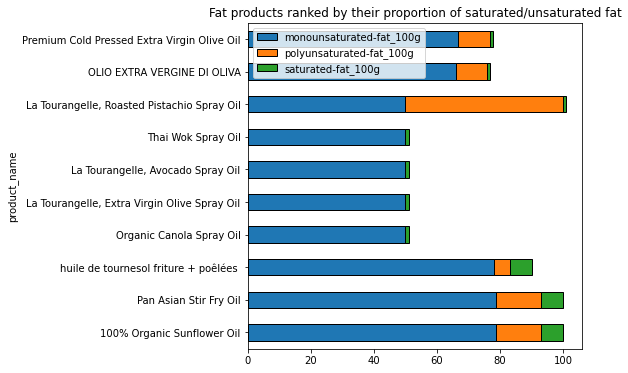

In [23]:
import seaborn as sns

fat_plot = df_fat[['coeff', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'saturated-fat_100g']].sort_values('coeff').tail(10)
fat_plot = fat_plot.drop(['coeff'], axis=1)

fat_plot.plot.barh(stacked=True, edgecolor='black', figsize=(6,6), title='Fat products ranked by their proportion of saturated/unsaturated fat')


Our winner is the olive oil, closely followed by the pistacchio and avocado oil.

### Which country uses the most additives ?

In [24]:
df['additives_n'] = df['additives_n'].astype('str')

We change the type object to string because we have some 'nan' lost among the numbers...

In [25]:
df['additives_n'].unique()

array(['0.0', '1.0', '2.0', '3.0', '6.0', '5.0', '8.0', '4.0', '10.0',
       '11.0', '9.0', '7.0', '14.0', '12.0', '18.0', '22.0', '13.0',
       '20.0', '23.0', '17.0', '26.0', '21.0', '25.0', '15.0', '24.0',
       '16.0', '19.0', '27.0', '29.0'], dtype=object)

We replace the 'nan' with '0' before to convert the column to float, to be able to get the mean:

In [26]:
df.loc[:,['additives_n']] = df.loc[:,['additives_n']].replace('nan', '0')

In [27]:
df['additives_n'] = df['additives_n'].astype('float64')
df2 = df.dropna(subset = ['origins'])

In [28]:
df2['origins'].value_counts().head(25)

France                              4170
España                               375
Union Européenne                     349
Italie                               349
Espagne                              308
Australia                            242
Deutschland                          235
Agricultura UE,Agricultura no UE     196
Suisse                               193
Belgique                             146
United Kingdom                       146
Union européenne                     120
Allemagne                            115
China                                111
Norvège                              102
Switzerland                           97
Portugal                              93
Maroc                                 89
Pérou                                 86
Agricultura UE                        85
Chine                                 83
Thaïlande                             79
EU                                    72
france                                70
Agriculture UE/n

We select only the 15 first countries we the most values to obtain significant results and remove 'Agricultura UE,Agricultura no UE' that is not specific enough, and rename 'Union européenne' to 'Union Européenne', 'Suisse' and Switerland' to 'Switzerland', 'España' to 'Espagne'.

NB : This is done more for the esthestim than utility because, if we have a large number of products, the mean number of additives of one country which is described by several strings (ex : 'Suisse', Switerland', 'Switzerland') should be close.

In [29]:
df2.loc[:,['origins']] = df2.loc[:,['origins']].replace('Union européenne', 'Union Européenne')
df2.loc[:,['origins']] = df2.loc[:,['origins']].replace('Suisse','Switzerland')
df2.loc[:,['origins']] = df2.loc[:,['origins']].replace('Switerland','Switerland')
df2.loc[:,['origins']] = df2.loc[:,['origins']].replace('España','Espagne')
df2.loc[:,['origins']] = df2.loc[:,['origins']].replace('Deutschland','Allemagne')



countries = []
for k,v in df2['origins'].value_counts().head(15).items():
    countries.append(k)
countries.remove('Agricultura UE,Agricultura no UE')
print(countries)

['France', 'Espagne', 'Union Européenne', 'Allemagne', 'Italie', 'Switzerland', 'Australia', 'United Kingdom', 'Belgique', 'China', 'Norvège', 'Portugal', 'Maroc', 'Pérou']


C:\Users\AsmaChabane\anaconda3\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [30]:
df_with_origins = df2[df2['origins'].isin(countries)]
df_with_origins

,created_datetime,last_modified_datetime,packaging,brands,categories,origins,labels,emb_codes,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,main_category,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Flute,2014-08-30T15:07:32Z,2016-04-23T18:54:29Z,"Paper,plastic film",Waitrose,"Plant-based foods and beverages,Plant-based fo...",France,NaN,NaN,NaN,"Brent,UK",Waitrose,United Kingdom,Wheat,NaN,NaN,NaN,0.0,[ wheat -> en:wheat ],0.0,0.0,NaN,Cereals and potatoes,Bread,"en:to-be-completed, en:nutrition-facts-complet...",en:plant-based-foods-and-beverages,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Côtes du Rhône Villages 2014,2016-09-17T08:09:01Z,2017-07-31T19:25:16Z,"Verre,71,Bouteille",Union des Vignerons des Cotes du Rhône,"Boissons,Boissons alcoolisées,Vins,Vins frança...",France,Déconseillé à certaines catégories de personne...,NaN,NaN,France,NaN,France,"Vin rouge, sec. Contient des _sulfites_.",sulfites,NaN,NaN,0.0,[ vin-rouge -> fr:vin-rouge ] [ vin -> fr:v...,0.0,0.0,NaN,NaN,Alcoholic beverages,"en:to-be-checked, en:complete, en:nutrition-fa...",en:beverages,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
Cauliflower,2014-09-01T14:48:04Z,2015-02-23T10:38:56Z,"Plastic,Bag","Sainsbury's,by sainsbury's","Plant-based foods and beverages,Plant-based fo...",United Kingdom,NaN,NaN,NaN,"Liverpool,United Kingdom",Sainsbury's,United Kingdom,Cauliflower,NaN,NaN,NaN,0.0,[ cauliflower -> en:cauliflower ],0.0,0.0,NaN,Fruits and vegetables,Vegetables,"en:to-be-checked, en:complete, en:nutrition-fa...",en:plant-based-foods-and-beverages,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,144.0,0.9,0.0,0.0,0.0,0.0,0.0,2.9,2.5,1.8,3.6,0.00000,0.000,0.0,0.043,0.0,0.0,0.0,0.0,0.0
Chair à saucisse,2014-11-04T16:40:56Z,2015-04-06T13:37:18Z,"Barquette,Plastique",Sovivo,Viandes de porc,France,NaN,FR 31.090.010 EC,"43.783333,0.983333",NaN,NaN,France,"Viandes de porc (86%), eau, acidifiant (E326),...",NaN,NaN,NaN,6.0,[ viandes-de-porc -> fr:viandes-de-porc ] [...,0.0,0.0,NaN,Fish Meat Eggs,Meat,"en:to-be-checked, en:complete, en:nutrition-fa...",en:meats,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0
British Beef Braising Steak,2014-12-26T18:19:40Z,2014-12-26T18:24:27Z,"tray - plastic, film - plastic","Simply M&S,Marks & Spencer",Beef,United Kingdom,NaN,UK 1715 EC,NaN,"United Kingdom,Liverpool",Marks & Spencer,United Kingdom,beef braising steak,NaN,NaN,NaN,0.0,[ beef-braising-steak -> en:beef-braising-ste...,0.0,0.0,a,Fish Meat Eggs,Meat,"en:to-be-checked, en:complete, en:nutrition-fa...",en:meats,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,615.0,6.4,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.1,0.17780,0.070,0.0,0.000,0.0,0.0,0.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Driscolls Raspberries,2015-03-01T15:57:44Z,2015-10-15T12:34:35Z,Plastic Punnet,"Costa Berries,Driscoll's",Fresh Raspberries,Australia,Product of Australia,Na

In [31]:
add_per_country = df_with_origins.groupby('origins')['additives_n'].mean().sort_values(ascending = False)

<AxesSubplot:title={'center':'Average number of additives per product per country'}, xlabel='origins'>

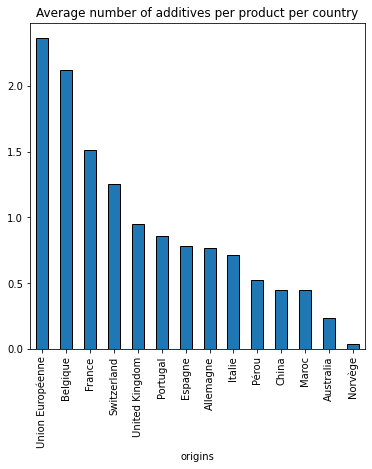

In [32]:
add_per_country.plot.bar(stacked=True, edgecolor='black', figsize=(6,6), title='Average number of additives per product per country')

#### 3-What is the macronutrient breakdown across different countries ?

In [33]:
macro = df_with_origins.groupby(['origins'])['carbohydrates_100g', 'fat_100g', 'proteins_100g'].mean()
macro.replace('Deutschland ', 'Allemagne')

<ipython-input-33-308b4d581c91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  macro = df_with_origins.groupby(['origins'])['carbohydrates_100g', 'fat_100g', 'proteins_100g'].mean()


,carbohydrates_100g,fat_100g,proteins_100g
origins,,,
Allemagne,16.724829,9.121429,5.568571
Australia,14.909917,7.141446,4.471694
Belgique,23.947349,10.921027,4.058360
China,12.489730,5.655937,6.527838
Espagne,7.286135,8.425204,3.486288
France,12.228164,9.462747,8.197068
Italie,21.831748,9.029695,6.790685
Maroc,1.812360,14.026404,5.736629
Norvège,0.928529,10.357843,17.695098


<AxesSubplot:title={'center':'Macronutrient breakdown'}, xlabel='origins'>

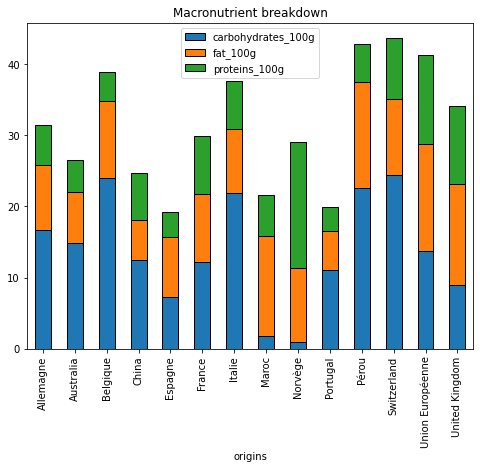

In [34]:
macro.plot.bar(stacked=True, figsize=(8,6), edgecolor='black', title='Macronutrient breakdown')


In [35]:
macro['dist_to_equi'] = abs(macro['carbohydrates_100g']/100-1/3)**2 + abs(macro['fat_100g']/100-1/3)**2 + abs(macro['proteins_100g']/100-1/3)**2

We compute the distance of one macro distribution to a perfectly balanced one (1/3, 1/3, 1/3), so the lower the value the better. We decide to use the least squared error so huge difference for one macronutrient with the balanced proportion is penalized

In [36]:
macro['dist_to_equi'].sort_values()

origins
Union Européenne    0.115062
Switzerland         0.120885
Pérou               0.124093
Italie              0.142747
Belgique            0.144743
United Kingdom      0.146043
Allemagne           0.163294
France              0.164706
Norvège             0.182250
Australia           0.185843
China               0.191903
Maroc               0.212791
Portugal            0.216601
Espagne             0.218972
Name: dist_to_equi, dtype: float64

The UE presents the best macronutrients breakdown.

## C. Text Data

In [37]:
df.columns

Index(['created_datetime', 'last_modified_datetime', 'packaging', 'brands',
       'categories', 'origins', 'labels', 'emb_codes',
       'first_packaging_code_geo', 'purchase_places', 'stores', 'countries',
       'ingredients_text', 'allergens', 'traces', 'serving_size',
       'additives_n', 'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'main_category',
       'image_url', 'image_small_url', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'potassium_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [38]:
df.head(500)

,created_datetime,last_modified_datetime,packaging,brands,categories,origins,labels,emb_codes,first_packaging_code_geo,purchase_places,stores,countries,ingredients_text,allergens,traces,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,main_category,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2243.0,28.57,28.57,0.0,0.0,0.0,0.0180,64.29,14.29,3.600,3.57,0.00000,0.000,0.000000,0.0214,0.0,0.000,0.001290,14.0,14.0
Peanuts,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1941.0,17.86,0.00,0.0,0.0,0.0,0.0000,60.71,17.86,7.100,17.86,0.63500,0.250,0.000000,0.0000,0.0,0.071,0.001290,0.0,0.0
Organic Salted Nut Mix,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,NaN,Grizzlies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",NaN,NaN,28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,2540.0,57.14,5.36,0.0,0.0,0.0,0.0000,17.86,3.57,7.100,17.86,1.22428,0.482,0.000000,0.0000,0.0,0.143,0.005140,12.0,12.0
Organic Polenta,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,NaN,Bob's Red Mill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,Organic polenta,NaN,NaN,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1552.0,1.43,0.00,0.0,0.0,0.0,0.0000,77.14,0.00,5.700,8.57,0.00000,0.000,0.000000,0.0000,0.0,0.000,0.000000,0.0,0.0
Breadshop Honey Gone Nuts Granola,2017-03-09T10:34:11Z,2017-03-09T10:34:11Z,NaN,Unfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Rolled oats, grape concentrate, expeller press...",NaN,NaN,52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,NaN,1933.0,18.27,1.92,0.0,0.0,0.0,0.0000,63.46,11.54,7.700,13.46,0.00000,0.000,0.000000,0.0000,0.0,0.038,0.003460,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mac 'n Cheese,2015-01-22T15:54:43Z,2015-07-21T12:43:02Z,box,Joe's Diner,Microwave meals,NaN,NaN,NaN,NaN,NaN,NaN,United States,"COOKED ELBOW MACARONI (WATER, ENRICHED SEMOLIN...","WHEAT, MILK, MILK, MILK, WHEAT, WHEAT, MILK, C...","Eggs,Fish,Peanuts,Soybeans,Shellfish,Tree nuts",198 g,5.0,[ cooked-elbow-macaroni -> en:cooked-elbow-ma...,0.0,0.0,c,Composite foods,One-dish meals,"en:to-be-checked, en:complete, en:nutrition-fa...",en:meals,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,761.0,7.58,4.04,0.0,0.0,0.0,0.0202,21.20,1.52,0.505,8.08,0.75700,0.298,0.000061,0.0000,0.0,0.101,0.000727,4.0,4.0
"Super Chunk, Peanut Butter Spread",2017-03-09T12:15:22Z,2017-03-09T12:15:22Z,NaN,Skippy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,"Roasted peanuts, sugar, palm oil, salt.",NaN,NaN,32 g (2 Tbsp),0.0,[ roasted-peanuts -> en:roasted-peanuts ] [...,0.0,0.0,d,NaN,

In [39]:
all_ing = {}
def get_ingredient(s):
    s = s.replace('(',',')
    s = s.replace(')',',')
    s = re.sub(r" ?\[[^]]+\)", "", s)
    s = s.lower()
    s = s.replace(' ','')
    s = s.replace('sea','')
    s = s.replace('sel','salt')
    s = s.replace('sucre','sugar')
    s = s.replace('eau','water')
    s = s.replace('.','')
    s = s.replace('organic','')
    s = s.replace('natural','')
    s = s.replace('concentrate','')
    s = s.replace('long','')
    s = s.replace('org','')
    s = s.replace('raw','')
    s = s.replace('dry','')
    s = s.replace('rolled','')
    s = s.replace('dry','')
    s = s.replace('roasted','')
    s = s.replace('seed','')
    s = s.replace('cheese','')
    s = s.replace('whole','')
    s = s.replace('enriched','')
    s = s.replace('grain','')
    s = s.replace('grains','')
    s = s.replace('extract','')
    s = s.replace('juice','')
    s = s.replace('solids','')
    s = s.replace('precooked','')
    s = s.replace('cooked','')
    s = s.replace('_','')
    s = s.replace('%','')
    s = s.replace('0','')
    s = s.replace('1','')
    s = s.replace('2','')
    s = s.replace('3','')
    s = s.replace('4','')
    s = s.replace('5','')
    s = s.replace('6','')
    s = s.replace('7','')
    s = s.replace('8','')
    s = s.replace('9','')
    for mot in s:
        if 'and' in mot:
            s = s+mot.strip('and')
            s.remove(mot)
    if '•' in s:
        s = s.split('•')
    else:
        s = s.split(',')
    for ingredient in s:
        if (ingredient != '') and (len(ingredient)>1):
            if (ingredient in all_ing.keys()):
                all_ing[ingredient] += 1 
            else:
                all_ing[ingredient] = 1
         


We remove the ingredients between parenthesis for the sake of simplicity. ex : vegetable oil (coconut oil, palm oil). We also remove the mention 'organic' or 'natural', not relevant here.
The first element of all_ing should contain all the ingredient mentionned  in the dataframe, while the second will contain their occurence.

In [40]:
df_ing = df["ingredients_text"]
df_ing = df_ing.fillna('')
df_ing.isna().sum()

0

We remove the nan value so we can apply our function and get the ingredient list.

In [41]:
df_ing.apply(lambda x : get_ingredient(x))

product_name
Banana Chips Sweetened (Whole)                                       None
Peanuts                                                              None
Organic Salted Nut Mix                                               None
Organic Polenta                                                      None
Breadshop Honey Gone Nuts Granola                                    None
                                                                     ... 
Tartines craquantes bio au sarrasin                                  None
Vins blanc du Bugey                                                  None
thé bio équitable                                                    None
Rillette d'oie                                                       None
Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint    None
Name: ingredients_text, Length: 220421, dtype: object

In [42]:
all_ing

{'bananas': 363,
 'vegetableoil': 4961,
 'coconutoil': 2204,
 'cornoiland/orpalmoil': 2,
 'sugar': 85799,
 'bananaflavor': 81,
 'peanuts': 2976,
 'wheatflour': 17720,
 'riceflour': 2667,
 'tapiocastarch': 1688,
 'salt': 119428,
 'leavening': 2406,
 'ammoniumbicarbonate': 601,
 'bakingsoda': 3412,
 'soysauce': 1385,
 'water': 77100,
 'soybeans': 2504,
 'wheat': 3617,
 'potatostarch': 2461,
 'hazelnuts': 576,
 'cashews': 1518,
 'walnutsalmonds': 1,
 'sunfloweroil': 4034,
 'polenta': 14,
 'oats': 2402,
 'grape': 852,
 'expellerpressedcanolaoil': 605,
 'sunflowers': 856,
 'almonds': 3819,
 'walnutsoatbran': 1,
 'sesames': 1132,
 'vitamine': 1019,
 'whiterice': 135,
 'hempgranola': 1,
 'evaporatedcane': 990,
 'expeller-pressedcanolaoil': 66,
 'crispyrice[brownriceflour': 1,
 'molasses': 3032,
 'salt]': 1147,
 'flaxs': 385,
 'oat': 107,
 'hemps': 102,
 'raisins': 1680,
 'dates': 443,
 'coconut': 1739,
 'pumpkins': 574,
 'cornflakes': 105,
 'cornmeal': 864,
 'grapeand/orpear': 3,
 'quinoaamar

In [43]:
ing_occu = pd.Series(all_ing)
ing_occu = ing_occu.sort_values(ascending=False).head(20)

<AxesSubplot:>

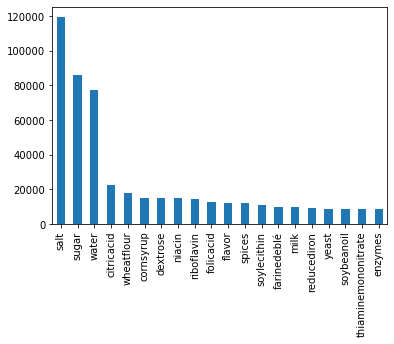

In [44]:
ing_occu.plot(kind='bar')

In [45]:
print("In a list of ", df_ing.shape[0], "products,", int(all_ing["salt"]/df_ing.shape[0]*100), "% contain salt and ",  int(all_ing["sugar"]/df_ing.shape[0]*100), "% contain sugar !")

In a list of  220421 products, 54 % contain salt and  38 % contain sugar !


## D.Time-series analysis

In [46]:
df["created_datetime"]

product_name
Banana Chips Sweetened (Whole)                                       2017-03-09T14:32:37Z
Peanuts                                                              2017-03-09T14:32:37Z
Organic Salted Nut Mix                                               2017-03-09T10:35:31Z
Organic Polenta                                                      2017-03-09T10:34:13Z
Breadshop Honey Gone Nuts Granola                                    2017-03-09T10:34:11Z
                                                                             ...         
Tartines craquantes bio au sarrasin                                  2015-07-25T09:47:06Z
Vins blanc du Bugey                                                  2013-07-10T18:20:08Z
thé bio équitable                                                    2013-04-28T15:30:39Z
Rillette d'oie                                                       2015-10-31T12:07:09Z
Mint Melange Tea A Blend Of Peppermint, Lemon Grass And Spearmint    2017-03-09T11:31:1

In [47]:
df_time = df[["created_datetime","last_modified_datetime"]] 
df_time = df_time.dropna()

In [48]:
df_time["created_datetime"] = df_time["created_datetime"].astype('string')
df_time["last_modified_datetime"] = df_time["last_modified_datetime"].astype('string')

In [49]:
#df_time = df_time[(df_time['last_modified_datetime'].str.len() == 19) & (df_time['created_datetime'].str.len() == 19)]

We delete the products which date is not in the correct format.

In [50]:

#df_time["created_datetime"] = pd.to_datetime(df_time["created_datetime"])
#df_time["last_modified_datetime"] = pd.to_datetime(df_time["last_modified_datetime"], infer_datetime_format= True)

df_time["created_datetime"] = pd.to_datetime(df_time["created_datetime"], errors='coerce', format='%Y-%m-%dT%H:%M:%SZ')
df_time["last_modified_datetime"] =  pd.to_datetime(df_time["last_modified_datetime"], errors='coerce', format='%Y-%m-%dT%H:%M:%SZ')

In [51]:
df_time

,created_datetime,last_modified_datetime
product_name,,
Banana Chips Sweetened (Whole),2017-03-09 14:32:37,2017-03-09 14:32:37
Peanuts,2017-03-09 14:32:37,2017-03-09 14:32:37
Organic Salted Nut Mix,2017-03-09 10:35:31,2017-03-09 10:35:31
Organic Polenta,2017-03-09 10:34:13,2017-03-09 10:34:13
Breadshop Honey Gone Nuts Granola,2017-03-09 10:34:11,2017-03-09 10:34:11
...,...,...
Tartines craquantes bio au sarrasin,2015-07-25 09:47:06,2015-09-14 13:37:28
Vins blanc du Bugey,2013-07-10 18:20:08,2016-01-03 20:00:15
thé bio équitable,2013-04-28 15:30:39,2013-06-20 01:09:16


## E. Build a database


##### 1-Selection of the data to build a database

In [52]:
df_database = df[["energy_100g", "countries", "main_category","serving_size", "sugars_100g"]]


In [53]:
df_database.isna().sum()

energy_100g           0
countries            73
main_category    150666
serving_size      73817
sugars_100g           0
dtype: int64

In [54]:
df_database = df_database.dropna()
df_database = df_database.sample(n=1000)
df_database

,energy_100g,countries,main_category,serving_size,sugars_100g
product_name,,,,,
Crème glacée au Rhum des Antilles Françaises (2%) avec des raisins macérés au rhum (11%),841.0,France,en:desserts,50 g,22.0
Boisson chocolatée à l'avoine,92.0,"France,Finlande,Allemagne,Pays-Bas,Norvège,Esp...",fr:boisson-a-base-d-avoine,25 cl,2.8
Compote de pomme fraise allégée en sucres issue de l'agriculture biologique,299.0,France,en:plant-based-foods-and-beverages,90 g,14.2
Jus de pamplemousse rose avec pulpe naturellement source de vitamine C,159.0,France,en:fruit-juices,200 ml soit 1 verre (Cet emballage contient l'...,8.5
"Eis mit Vanillegeschmack, Eis Heidelbeer, Heidelbeersauce (14%), und weiße und dunkle Schokoladenherzen (1,5%)",107.0,Deutschland,en:desserts,100 ml,15.0
...,...,...,...,...,...
Gourmet Powder,0.0,France,en:food-additives,1 g,0.0
Financiers pur beurre aux amandes,1962.0,France,en:sugary-snacks,25 g,35.0
Le Liégeois saveur Praliné,614.0,France,en:dairies,100 g,15.0


##### 2- Connection to a sqlite3 database

In [55]:
db = sqlite3.connect("database_openfoodfacts.db")

##### 3- Create one or multiple tables, at least one of the tables should have a PRIMARY KEY

In [56]:
query = "CREATE TABLE products (product_name TEXT PRIMARY KEY, energy INTEGER, countries TEXT, category TEXT, serving_size TEXT, surgars_100g INTEGER);"


##### 4-Fill the database with your data

In [57]:
df_to_sql = df_database.to_sql(name='products', con=db, if_exists='append', index=False)

##### 5-Run at least one query to demonstrate that it works correctly

In [58]:
def run_query(query):
    return pd.read_sql_query(query,db)

In [59]:
run_query('''
SELECT * FROM products''')

,energy_100g,countries,main_category,serving_size,sugars_100g
0,1490.0,France,en:meals,230g de purée (1 assiette),3.0
1,1689.0,France,en:plant-based-foods-and-beverages,30g,22.0
2,1961.0,France,en:sugary-snacks,30 g,35.0
3,0.0,Madagascar,en:beverages,1 l,0.0
4,1067.0,France,en:sugary-snacks,5 g,0.5
...,...,...,...,...,...
6995,0.0,France,en:food-additives,1 g,0.0
6996,1962.0,France,en:sugary-snacks,25 g,35.0
6997,614.0,France,en:dairies,100 g,15.0
6998,364.0,France,en:canned-foods,169 g (Cet emballage contient une portion de 1...,1.3


In [60]:
run_query('SELECT * FROM products')


,energy_100g,countries,main_category,serving_size,sugars_100g
0,1490.0,France,en:meals,230g de purée (1 assiette),3.0
1,1689.0,France,en:plant-based-foods-and-beverages,30g,22.0
2,1961.0,France,en:sugary-snacks,30 g,35.0
3,0.0,Madagascar,en:beverages,1 l,0.0
4,1067.0,France,en:sugary-snacks,5 g,0.5
...,...,...,...,...,...
6995,0.0,France,en:food-additives,1 g,0.0
6996,1962.0,France,en:sugary-snacks,25 g,35.0
6997,614.0,France,en:dairies,100 g,15.0
6998,364.0,France,en:canned-foods,169 g (Cet emballage contient une portion de 1...,1.3


In [61]:
run_query('''
SELECT * FROM products
WHERE countries = 'France'
''')

,energy_100g,countries,main_category,serving_size,sugars_100g
0,1490.0,France,en:meals,230g de purée (1 assiette),3.0
1,1689.0,France,en:plant-based-foods-and-beverages,30g,22.0
2,1961.0,France,en:sugary-snacks,30 g,35.0
3,1067.0,France,en:sugary-snacks,5 g,0.5
4,2075.0,France,en:sugary-snacks,25 g,38.0
...,...,...,...,...,...
4674,0.0,France,en:food-additives,1 g,0.0
4675,1962.0,France,en:sugary-snacks,25 g,35.0
4676,614.0,France,en:dairies,100 g,15.0
4677,364.0,France,en:canned-foods,169 g (Cet emballage contient une portion de 1...,1.3


In [62]:
run_query('''
SELECT * FROM products 
ORDER BY energy_100g DESC
''')

,energy_100g,countries,main_category,serving_size,sugars_100g
0,3770.0,France,en:plant-based-foods-and-beverages,15 ml,0.0
1,3766.0,France,en:plant-based-foods-and-beverages,10 g,0.0
2,3766.0,France,en:plant-based-foods-and-beverages,10 g,0.0
3,3766.0,France,en:plant-based-foods-and-beverages,10 g,0.0
4,3766.0,France,en:fats,1 cuillère à soupe (10g),0.0
...,...,...,...,...,...
6995,0.0,United States,en:juice,8 fl oz,0.0
6996,0.0,United Kingdom,en:beverages,500 ml,0.0
6997,0.0,"France,Netherlands",en:beverages,355 ml,0.0
6998,0.0,France,en:beverages,25 cl,0.0


### F. Finding correlations

In [63]:
corr = abs(df.corr())
corr[['nutrition-score-fr_100g']].sort_values(['nutrition-score-fr_100g'], axis=1)

,nutrition-score-fr_100g
additives_n,0.128470
ingredients_from_palm_oil_n,0.124091
ingredients_that_may_be_from_palm_oil_n,0.058248
energy_100g,0.505549
fat_100g,0.001857
saturated-fat_100g,0.601738
monounsaturated-fat_100g,0.014559
polyunsaturated-fat_100g,0.019959
trans-fat_100g,0.017737
cholesterol_100g,0.024829


<AxesSubplot:>

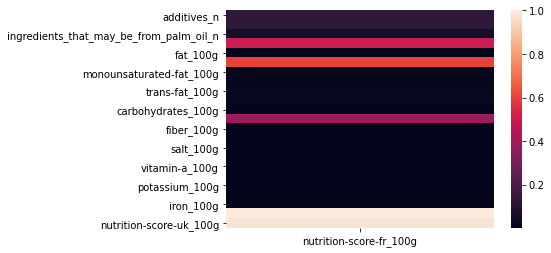

In [64]:
sns.heatmap(corr[['nutrition-score-fr_100g']])

We can see that sugars, saturated fat and the energy are the parameters most correlated with the nutrionnal score. We assume that a high quantity of them is detrimental for the nutrional score, let's verify this assumption :

FAIRE UN BAR PLOT pour chaque parametre où on visualise le parametre et nutrition score en bar cote a cote

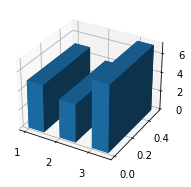

In [65]:
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
x = [1, 2, 3]  # x coordinates of each bar
y = [0, 0, 0]  # y coordinates of each bar
z = [0, 0, 0]  # z coordinates of each bar
dx = [0.5, 0.5, 0.5]  # Width of each bar
dy = [0.5, 0.5, 0.5]  # Depth of each bar
dz = [5, 4, 7]        # Height of each bar
ax1.bar3d(x, y, z, dx, dy, dz)



#top = df['nutrition-score-fr_100g']
#ax1.bar3d(x = [1, 2, 3], df['sugars_100g'], 'sugars', df['nutrition-score-fr_100g'])


ValueError: shape mismatch: objects cannot be broadcast to a single shape

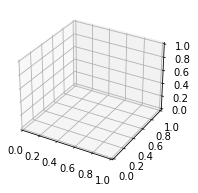

In [66]:
df_s = df[ df['sugars_100g'] > 80]




fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
x = df['sugars_100g'].head(5)  # x coordinates of each bar
y = [0, 0, 0,0,0]  # y coordinates of each bar
z = [0, 0, 0,0,0]  # z coordinates of each bar
dx = [0.5, 0.5, 0.5]  # Width of each bar
dy = [0.5, 0.5, 0.5]  # Depth of each bar
dz = df['nutrition-score-fr_100g'].head(5)        # Height of each bar
ax1.bar3d(x, y, z, dx, dy, dz)


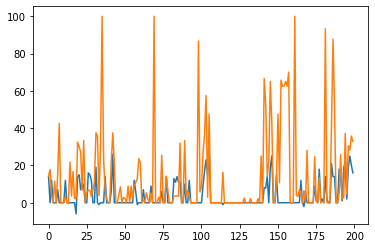

In [122]:
plt.plot(range(0,200), df['nutrition-score-fr_100g'].head(200))
plt.plot(range(0,200), df['sugars_100g'].head(200))

In [141]:
i=0
histo = []#[[],[],[]]
for col in ['sugars_100g', 'saturated-fat_100g', 'energy_100g']:
    df_ = df
    print(col)
    Q1 = df_[col].quantile(0.3)
    Q2 = df_[col].quantile(0.6)
    print(Q1)
    print(Q2)
    for step in [ Q1, Q2, 100000]:
        
        histo.append(df_[ df_[col] <= step ]['nutrition-score-fr_100g'].mean())
        df_ = df_[ df_[col] > step ]
       
    i+=1

sugars_100g
1.0
8.33
saturated-fat_100g
0.0
2.3
energy_100g
437.0
1350.0


In [143]:
histo


[4.769950492131785,
 5.076968318088252,
 12.010757089900162,
 2.767091357301506,
 3.0653733775913814,
 15.051288449324018,
 1.1905344942257694,
 6.855745092701811,
 13.341305679729516]

Text(0.5, 0, 'average nutrional score (fr)')

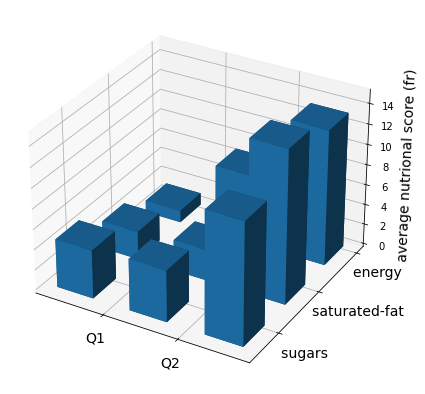

In [162]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(121, projection='3d')
x = [0.75, 1.75, 2.75,0.75, 1.75, 2.75,0.75, 1.75, 2.75]  # x coordinates of each bar
y = [1,1,1,2,2, 2,3,3, 3]  # y coordinates of each bar
z = [0, 0, 0,0, 0, 0,0, 0, 0]  # z coordinates of each bar
dx = [0.5, 0.5, 0.5,0.5, 0.5, 0.5,0.5, 0.5, 0.5]  # Width of each bar
dy = [0.5, 0.5, 0.5,0.5, 0.5, 0.5,0.5, 0.5, 0.5]  # Depth of each bar
dz = histo        # Height of each bar
ax1.bar3d(x, y, z, dx, dy, dz)
plt.yticks([1.5,2.5,3.5], ['      sugars','            saturated-fat', '    energy'], fontsize=14)
plt.xticks([1.5,2.5], ['Q1', 'Q2'], fontsize=14)

ax1.set_zlabel('average nutrional score (fr)', fontsize=14)